In [55]:
import pandas as pd 
data = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/mergedTratado.csv", delimiter = ',',  index_col=0)
data_17_18 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1718tratado.csv", delimiter = ',',  index_col=0)
data_18_19 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1819tratado.csv", delimiter = ',',  index_col=0)
data_19_20 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1920tratado.csv", delimiter = ',',  index_col=0)

data.head()

,nationality,position,age,birth_year,value,height,position2,foot,league,games,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,season_year,classificacao
player,,,,,,,,,,,,,,,,,,,,,
Burgui,ESP,"FW,MF",23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,La Liga,23.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
Raphaël Varane,FRA,DF,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,La Liga,27.0,...,2.00,83.3,45.4,37.9,1.00,1.0,1.0,0.0,2018,3.0
Rubén Duarte,ESP,DF,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,La Liga,24.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
Samuel Umtiti,FRA,DF,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,La Liga,25.0,...,2.45,78.3,41.1,37.2,0.98,1.0,0.0,0.0,2018,1.0
Manu García,ESP,MF,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,La Liga,30.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0


In [56]:
'''
colunas_numericas = data.select_dtypes(include=[float, int])

# Calcule a correlação entre as variáveis numéricas e a variável alvo
correlacao = colunas_numericas.corrwith(data['value'])

# Criar uma lista para armazenar as colunas a serem removidas
colunas_removidas = []

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")
    
    # Verificar se a correlação é negativa
    if correlacao_valor < 0.2:
        colunas_removidas.append(coluna)

# Remover as colunas com correlação negativa do DataFrame
data = data.drop(colunas_removidas, axis=1)
'''

'\ncolunas_numericas = data.select_dtypes(include=[float, int])\n\n# Calcule a correlação entre as variáveis numéricas e a variável alvo\ncorrelacao = colunas_numericas.corrwith(data[\'value\'])\n\n# Criar uma lista para armazenar as colunas a serem removidas\ncolunas_removidas = []\n\nfor coluna in colunas_numericas.columns:\n    correlacao_valor = correlacao[coluna]\n    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")\n    \n    # Verificar se a correlação é negativa\n    if correlacao_valor < 0.2:\n        colunas_removidas.append(coluna)\n\n# Remover as colunas com correlação negativa do DataFrame\ndata = data.drop(colunas_removidas, axis=1)\n'

In [57]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['nationality', 'position', 'position2', 'foot', 'league']


In [58]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

dropped = data.drop(['value'], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop(['nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'nationality', 'position', 'position2', 'foot', 'league']]
target = data['value']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Epoch 1/100
45/45 [==============================] - 0s 1ms/step - loss: 255252724973568.0000
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 204299950882816.0000
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 180001945157632.0000
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 156690926272512.0000
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 151612781756416.0000
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 143764500774912.0000
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 145443447111680.0000
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 128985761579008.0000
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 125224276197376.0000
Epoch 10/100
45/45 [==============================] - 0s 1ms/step - loss: 124820431831040.0000
Epoch 11/100
45/45 [==============================] - 0s 1m

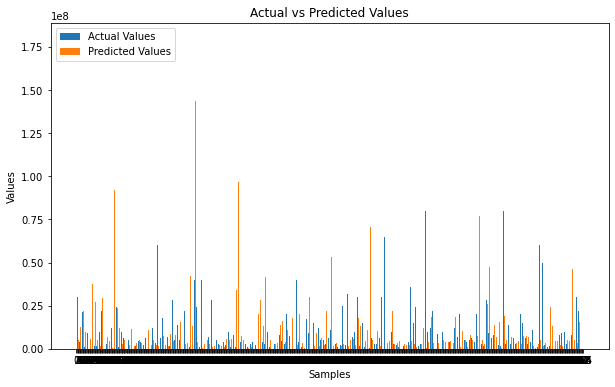

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)


# Make predictions
predictions = model.predict(X_test)



# Print the predicted market values
for i in range(len(predictions)):
    print('Predicted:', predictions[i][0], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score

# Compute additional metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Compute R-squared score
r2_score = r2_score(y_test, predictions)
print('R-squared:', r2_score)

# Prepare data for bar chart
indices = np.arange(len(predictions))
width = 0.35

# Plot predicted and actual values as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(indices, y_test, width, label='Actual Values')
bar2 = ax.bar(indices + width, predictions.flatten(), width, label='Predicted Values')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()


Random Forest - Predicted: 33023386.36805204 Actual: 40000000.0
Random Forest - Predicted: 5819909.758726907 Actual: 8000000.0
Random Forest - Predicted: 16148102.341159752 Actual: 30000000.0
Random Forest - Predicted: 8908889.078792507 Actual: 8000000.0
Random Forest - Predicted: 6163026.628068848 Actual: 3000000.0
Random Forest - Predicted: 7236531.782499595 Actual: 4000000.0
Random Forest - Predicted: 15032926.181466423 Actual: 8000000.0
Random Forest - Predicted: 9119454.985151684 Actual: 9000000.0
Random Forest - Predicted: 2878116.514065463 Actual: 75000.0
Random Forest - Predicted: 16415959.770994343 Actual: 21500000.0
Random Forest - Predicted: 37340604.99580044 Actual: 65000000.0
Random Forest - Predicted: 18348540.46482713 Actual: 11000000.0
Random Forest - Predicted: 3328186.643137297 Actual: 1000000.0
Random Forest - Predicted: 10704532.20123804 Actual: 4000000.0
Random Forest - Predicted: 6692228.972582519 Actual: 5000000.0
Random Forest - Predicted: 1054377.3835169426 Act

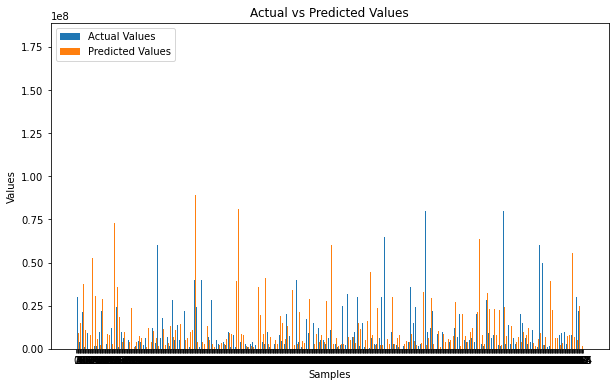

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split= 2, min_samples_leaf=2, max_features='sqrt', max_depth=10)

rf_model.fit(X_train, y_train)

# Evaluate the models
rf_predictions = rf_model.predict(X_test)


# Print the predicted market values using Random Forest
for i in range(len(rf_predictions)):
    print('Random Forest - Predicted:', rf_predictions[i], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score
r2_score = r2_score(y_test, rf_predictions)
print('R-squared:', r2_score)


# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print('Random Forest Mean Absolute Error:', rf_mae)


# Prepare data for bar chart
indices = np.arange(len(rf_predictions))
width = 0.35

# Plot predicted and actual values as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(indices, y_test, width, label='Actual Values')
bar2 = ax.bar(indices + width, rf_predictions, width, label='Predicted Values')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()

XGBoost with Feature Selection - Predicted: 30193446.0 Actual: 40000000.0
XGBoost with Feature Selection - Predicted: 4786521.5 Actual: 8000000.0
XGBoost with Feature Selection - Predicted: 10095577.0 Actual: 30000000.0
XGBoost with Feature Selection - Predicted: 7840641.0 Actual: 8000000.0
XGBoost with Feature Selection - Predicted: 4927844.5 Actual: 3000000.0
XGBoost with Feature Selection - Predicted: 8457457.0 Actual: 4000000.0
XGBoost with Feature Selection - Predicted: 16677760.0 Actual: 8000000.0
XGBoost with Feature Selection - Predicted: 9357882.0 Actual: 9000000.0
XGBoost with Feature Selection - Predicted: 725592.7 Actual: 75000.0
XGBoost with Feature Selection - Predicted: 9482157.0 Actual: 21500000.0
XGBoost with Feature Selection - Predicted: 38525104.0 Actual: 65000000.0
XGBoost with Feature Selection - Predicted: 13239270.0 Actual: 11000000.0
XGBoost with Feature Selection - Predicted: 4028772.0 Actual: 1000000.0
XGBoost with Feature Selection - Predicted: 15272998.0 Ac

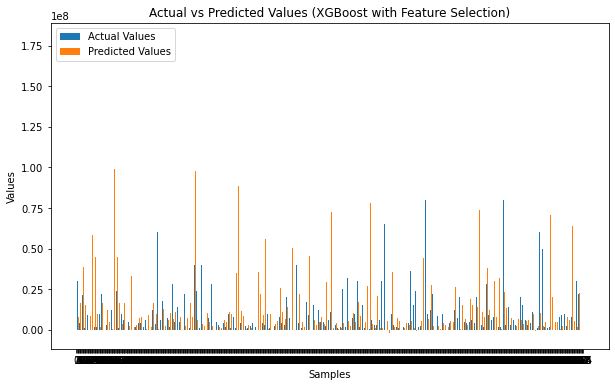

In [62]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(subsample=1.0, n_estimators=700, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, n_jobs=-1, gamma=1.0)
xgb_model.fit(X_train, y_train)

# Get feature importances
importance_scores = xgb_model.feature_importances_

# Select top-k important features
k = 40
top_k_features_indices = importance_scores.argsort()[-k:][::-1]
top_k_features = X_train[:, top_k_features_indices]

# Train and evaluate the model using the selected features
xgb_model_selected = xgb.XGBRegressor(subsample=1.0, n_estimators=700, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, n_jobs=-1, gamma=1.0)
xgb_model_selected.fit(top_k_features, y_train)
xgb_predictions_selected = xgb_model_selected.predict(X_test[:, top_k_features_indices])



# Print the predicted market values using XGBoost with selected features
for i in range(len(xgb_predictions_selected)):
    print('XGBoost with Feature Selection - Predicted:', xgb_predictions_selected[i], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score with selected features
r2_score_selected = r2_score(y_test, xgb_predictions_selected)
print('R-squared with Feature Selection:', r2_score_selected)

# Evaluate the model with selected features
xgb_mse_selected = mean_squared_error(y_test, xgb_predictions_selected)
print('XGBoost with Feature Selection Mean Squared Error:', xgb_mse_selected)


# Prepare data for bar chart
indices = np.arange(len(xgb_predictions_selected))
width = 0.35

# Plot predicted and actual values as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(indices, y_test, width, label='Actual Values')
bar2 = ax.bar(indices + width, xgb_predictions_selected, width, label='Predicted Values')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values (XGBoost with Feature Selection)')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()

LightGBM with Feature Selection - Predicted: 34553535.789381795 Actual: 40000000.0
LightGBM with Feature Selection - Predicted: 7824881.867870362 Actual: 8000000.0
LightGBM with Feature Selection - Predicted: 18721396.75116077 Actual: 30000000.0
LightGBM with Feature Selection - Predicted: 5823517.590530969 Actual: 8000000.0
LightGBM with Feature Selection - Predicted: 4446914.465926375 Actual: 3000000.0
LightGBM with Feature Selection - Predicted: 7254750.523527697 Actual: 4000000.0
LightGBM with Feature Selection - Predicted: 10525225.233538577 Actual: 8000000.0
LightGBM with Feature Selection - Predicted: 10264099.08289246 Actual: 9000000.0
LightGBM with Feature Selection - Predicted: -214493.2491218242 Actual: 75000.0
LightGBM with Feature Selection - Predicted: 16430359.416384203 Actual: 21500000.0
LightGBM with Feature Selection - Predicted: 38124921.59871819 Actual: 65000000.0
LightGBM with Feature Selection - Predicted: 18747007.072116293 Actual: 11000000.0
LightGBM with Featur

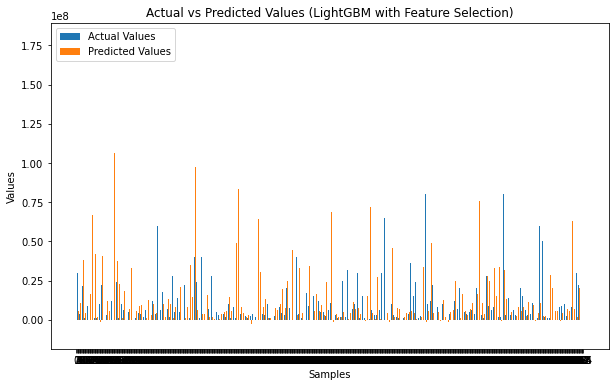

In [63]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model.fit(X_train, y_train)

# Get feature importances
importance_scores = lgb_model.feature_importances_

# Select top-k important features
k = 40
top_k_features_indices = importance_scores.argsort()[-k:][::-1]
top_k_features = X_train[:, top_k_features_indices]

# Train and evaluate the model using the selected features
lgb_model_selected = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model_selected.fit(top_k_features, y_train)
lgb_predictions_selected = lgb_model_selected.predict(X_test[:, top_k_features_indices])



# Print the predicted market values using LightGBM with selected features
for i in range(len(lgb_predictions_selected)):
    print('LightGBM with Feature Selection - Predicted:', lgb_predictions_selected[i], 'Actual:', y_test.iloc[i])



# Evaluate the model with selected features
lgb_mse_selected = mean_squared_error(y_test, lgb_predictions_selected)
print('LightGBM with Feature Selection Mean Squared Error:', lgb_mse_selected)

from sklearn.metrics import r2_score
# Compute R-squared score with selected features
r2_score_selected = r2_score(y_test, lgb_predictions_selected)
print('R-squared with Feature Selection:', r2_score_selected)

# Prepare data for bar chart
indices = np.arange(len(lgb_predictions_selected))
width = 0.35

# Plot predicted and actual values as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(indices, y_test, width, label='Actual Values')
bar2 = ax.bar(indices + width, lgb_predictions_selected, width, label='Predicted Values')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values (LightGBM with Feature Selection)')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()

In [64]:
''' Tentativa de usar uma época de treino e uma outra época para teste



from sklearn.model_selection import train_test_split

dropped1 = data_17_18.drop(['value'], axis=1)
dropped2 = data_18_19.drop(['value'], axis=1)
dropped3 = data_19_20.drop(['value'], axis=1)

# Select the relevant features and target variable
features_scale = dropped1.drop(['nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped1[[ 'nationality', 'position', 'position2', 'foot', 'league']]
target = data_17_18['value']

features_scale1 = dropped2.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode1 = dropped2[[ 'nationality', 'position', 'position2', 'foot', 'league']]
target1 = data_18_19['value']

features_scale2 = dropped3.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode2 = dropped3[[  'nationality', 'position',  'position2', 'foot', 'league']]
target2 = data_19_20['value']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

scaled_features1 = features_scale1.apply(pd.to_numeric, errors='coerce').values
scaled_features1 = np.nan_to_num(scaled_features1)

scaled_features2 = features_scale2.apply(pd.to_numeric, errors='coerce').values
scaled_features2 = np.nan_to_num(scaled_features2)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

encoder1 = OneHotEncoder()
encoded_features1 = encoder1.fit_transform(features_encode1).toarray()

encoder2 = OneHotEncoder()
encoded_features2 = encoder2.fit_transform(features_encode2).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

features1 = np.concatenate((scaled_features1, encoded_features1), axis=1)

features2 = np.concatenate((scaled_features2, encoded_features2), axis=1)

# Divida os dados da primeira época em conjuntos de treinamento e teste
X_train_17_18, X_test_17_18, y_train_17_18, y_test_17_18 = train_test_split(features, target, test_size= 0.6, random_state=42)

# Divida os dados da segunda época em conjuntos de treinamento e teste
X_train_18_19, X_test_18_19, y_train_18_19, y_test_18_19 = train_test_split(features1, target1, test_size=0.6, random_state=42)

# Divida os dados da terceira época em conjuntos de treinamento e teste
X_train_19_20, X_test_19_20, y_train_19_20, y_test_19_20 = train_test_split(features2, target2, test_size=0.2, random_state=42)
'''

" Tentativa de usar uma época de treino e uma outra época para teste\n\n\n\nfrom sklearn.model_selection import train_test_split\n\ndropped1 = data_17_18.drop(['value'], axis=1)\ndropped2 = data_18_19.drop(['value'], axis=1)\ndropped3 = data_19_20.drop(['value'], axis=1)\n\n# Select the relevant features and target variable\nfeatures_scale = dropped1.drop(['nationality', 'position', 'position2', 'foot', 'league'], axis=1)\nfeatures_encode = dropped1[[ 'nationality', 'position', 'position2', 'foot', 'league']]\ntarget = data_17_18['value']\n\nfeatures_scale1 = dropped2.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)\nfeatures_encode1 = dropped2[[ 'nationality', 'position', 'position2', 'foot', 'league']]\ntarget1 = data_18_19['value']\n\nfeatures_scale2 = dropped3.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)\nfeatures_encode2 = dropped3[[  'nationality', 'position',  'position2', 'foot', 'league']]\ntarget2 = data_19_20['value']\n\n

In [65]:
'''
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model.fit(X_train_17_18, y_train_17_18)

importance_scores = lgb_model.feature_importances_

k = 40
top_k_features_indices = importance_scores.argsort()[-k:][::-1]
top_k_features = X_train_17_18[:, top_k_features_indices]

lgb_model_selected = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model_selected.fit(top_k_features, y_train_17_18)

# Ajustar as dimensões de X_test_18_19
X_test_18_19_adjusted = X_test_18_19[:, :top_k_features.shape[1]]

lgb_predictions_selected = lgb_model_selected.predict(X_test_18_19_adjusted)

lgb_mse_selected = mean_squared_error(y_test_18_19, lgb_predictions_selected)
print('LightGBM with Feature Selection Mean Squared Error:', lgb_mse_selected)

# Print the predicted market values using LightGBM with selected features
for i in range(len(lgb_predictions_selected)):
    print('LightGBM with Feature Selection - Predicted:', lgb_predictions_selected[i], 'Actual:', y_test.iloc[i])

r2_score_selected = r2_score(y_test_18_19, lgb_predictions_selected)
print('R-squared with Feature Selection:', r2_score_selected)


'''

"\nlgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)\nlgb_model.fit(X_train_17_18, y_train_17_18)\n\nimportance_scores = lgb_model.feature_importances_\n\nk = 40\ntop_k_features_indices = importance_scores.argsort()[-k:][::-1]\ntop_k_features = X_train_17_18[:, top_k_features_indices]\n\nlgb_model_selected = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)\nlgb_model_selected.fit(top_k_features, y_train_17_18)\n\n# Ajustar as dimensões de X_test_18_19\nX_test_18_19_adjusted = X_test_18_19[:, :top_k_features.shape[1]]\n\nlgb_predictions_selected = lgb_model_selected.predict(X_test_18_19_adjusted)\n\nlgb_mse_selected = mean_squared_error(y_test_18_19, lgb_predictions_selected)\nprint('LightGBM with Feature Selection Mean Squared Error:', lgb_mse_selected)\n\n# Print the predicted market values using LightGBM with selected features\nfor i in range(len(lgb_predictions_selected)):\n    print('LightGBM with Feature Selection - Predicted:', lgb

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb


X = features # Features
y = target  # Target variable

n_folds = 10  # Número de folds desejado

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [67]:
from sklearn.neural_network import MLPRegressor


nn_model1 = MLPRegressor()

scores = cross_val_score(nn_model1, X, y, cv=kf, scoring='r2')

# Print the mean and standard deviation of R-squared scores
print(f'Model: Neural Network (MLPRegressor)')
print('Mean R-squared:', scores.mean())
print('Std R-squared:', scores.std())

/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

Model: Neural Network (MLPRegressor)
Mean R-squared: 0.18701713672633158
Std R-squared: 0.04124806962742755


/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [68]:
rf_model1 = RandomForestRegressor()


scores = cross_val_score(rf_model1, X, y, cv=kf, scoring='r2')

# Print the mean and standard deviation of R-squared scores
print(f'Model: Random Forest (RandomForestRegressor)')
print('Mean R-squared:', scores.mean())
print('Std R-squared:', scores.std())


Model: Random Forest (RandomForestRegressor)
Mean R-squared: 0.6815819229200915
Std R-squared: 0.04175836293885367


In [69]:
xgb_model1 = xgb.XGBRegressor()

# Perform cross-validation
scores = cross_val_score(xgb_model1, X, y, cv=kf, scoring='r2')

# Print the mean and standard deviation of R-squared scores
print(f'Model: XGBoost (XGBRegressor)')
print('Mean R-squared:', scores.mean())
print('Std R-squared:', scores.std())


Model: XGBoost (XGBRegressor)
Mean R-squared: 0.6995618045620612
Std R-squared: 0.07040540923283668


In [70]:
lgb_model1 = lgb.LGBMRegressor()

# Perform cross-validation
scores = cross_val_score(lgb_model1, X, y, cv=kf, scoring='r2')

# Print the mean and standard deviation of R-squared scores
print(f'Model: LightGBM (LGBMRegressor)')
print('Mean R-squared:', scores.mean())
print('Std R-squared:', scores.std())


Model: LightGBM (LGBMRegressor)
Mean R-squared: 0.7249005624598497
Std R-squared: 0.051999168271237926
